## 4. Modelling | Outlier Detection


> Outlier Detection is a very important step in Machine Learning. Where we can find instances which are different from the distribution of the other observations. Outliers can have a significant impact on the accuracy of the models and therefore it is important to identify and handle them appropriately.


> The outlier detection is performed using Various methods like LOF, ISF and One-Class SVM.






In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('step_2_Data_Prep.csv')

In [ ]:
df

,accident_year,day_of_week,weather,type_of_collision,ped_action,road_surface,lighting,intersection,number_killed,number_injured,...,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season,collision_category,lighting_categorized
0,2013,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,0,1,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring,Head-On,Daylight
1,2013,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Dark - Street Lights,Intersection <= 20ft,0,1,...,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall,Rear End,Dark - Street Lights
2,2014,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Daylight,Intersection <= 20ft,0,1,...,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter,Broadside,Daylight
3,2017,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Not Stated,Midblock > 20ft,0,1,...,Moderate Injury,Normal,Party 1,Driver,Not Stated/Other,South,Not Stated,Fall,Overturned,Not Stated
4,2019,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Daylight,Midblock > 20ft,0,1,...,Minor Injury,Normal,Party 1,Driver,Not Stated/Other,West,Not Stated,Fall,Hit Object,Daylight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,2022,Thursday,Clear,Head-On,No Pedestrian Involved,Dry,Daylight,Intersection <= 20ft,0,1,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Fall,Head-On,Daylight
55140,2018,Friday,Clear,Vehicle/Pedestrian,Crossing in Crosswalk at Intersection,Dry,Daylight,Intersection <= 20ft,0,1,...,Minor Injury,Normal,Party 1,Driver,Pedestrian,North,Not Stated,Winter,Vehicle/Pedestrian,Daylight
55141,2013,Thursday,Clear,Hit Object,No Pedestrian Involved,Dry,Dark - Street Lights,Midblock > 20ft,0,1,...,Moderate Injury,Normal,Party 1,Bicycle,Not Stated/Other,East,Not Stated,Summer,Hit Object,Dark - Street Lights
55142,2022,Thursday,Clear,Broadside,No Pedestrian Involved,Dry,Dark - Street Lights,Intersection <= 20ft,0,2,...,Moderate Injury,Normal,Party 1,Not Stated/Other,Driver,North,West,Winter,Broadside,Dark - Street Lights


In [ ]:
for col in df.columns:
    print('Column:', col)
    print(df[col].value_counts())
    print()

Column: accident_year
2019    3468
2017    3424
2016    3296
2018    3294
2012    3267
2005    3254
2010    3095
2011    3093
2007    3062
2013    3055
2008    3038
2015    3022
2014    2944
2009    2895
2006    2894
2022    2874
2021    2735
2020    2433
1987       1
Name: accident_year, dtype: int64

Column: day_of_week
Friday       8657
Wednesday    8280
Tuesday      8248
Thursday     8224
Monday       7505
Saturday     7499
Sunday       6731
Name: day_of_week, dtype: int64

Column: weather
Clear      45248
Cloudy      5561
Raining     3247
Other        795
Fog          244
Wind          47
Snowing        2
Name: weather, dtype: int64

Column: type_of_collision
Broadside             16798
Vehicle/Pedestrian    11801
Rear End               8975
Sideswipe              7141
Other/Not Stated       4108
Head-On                3247
Hit Object             2086
Overturned              988
Name: type_of_collision, dtype: int64

Column: ped_action
No Pedestrian Involved                       

### Feature Encoding:

It employs one-hot encoding (via pd.get_dummies) for categorical features, excluding a specific column ('collision_severity_label'), likely the target variable for outlier detection or classification tasks.

In [ ]:
df_encoded = pd.get_dummies(df.drop('collision_severity_label', axis=1))

In [ ]:
df_encoded

,accident_year,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,...,collision_category_Other/Not Stated,collision_category_Overturned,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated
0,2013,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2013,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,2014,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2017,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2019,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,2022,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
55140,2018,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
55141,2013,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
55142,2022,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Standard Scalar

In [ ]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_encoded)

In [ ]:
std_scaled = pd.DataFrame(std_scaled, columns=df_encoded.columns)

In [ ]:
std_scaled

,accident_year,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,...,collision_category_Other/Not Stated,collision_category_Overturned,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated
0,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,-0.418661,2.384479,-0.420335,-2.138306,...,-0.283711,-0.135069,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886
1,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,2.681891,-0.418661,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,2.268078,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886
2,0.108628,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886
3,0.693742,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.283711,7.403632,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,-1.359810,-0.189726,10.112661
4,1.083818,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886
55140,0.888780,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,-0.440902,-0.385696,1.916461,-0.094589,-0.651060,0.735397,-0.189726,-0.098886
55141,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886
55142,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.283711,-0.135069,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886


## **Dimensionality Reduction:**

The notebook outlines steps for applying PCA and LDA after standardizing the data using StandardScaler. These steps are likely aimed at reducing the dimensionality of the data while preserving as much variance (PCA) or class separability (LDA) as possible.


## PCA with std_scalar

In [ ]:
pca = PCA()
pca.fit_transform(std_scaled)

array([[-1.51710852e+00, -8.72391973e-01,  2.25990891e-01, ...,
         1.25017118e-15,  5.39820481e-16, -8.26841725e-16],
       [-6.79017127e-01,  2.37548245e+00, -9.69907986e-01, ...,
        -1.41083164e-16,  5.23077893e-16, -1.26589496e-15],
       [-1.14245087e+00, -1.21862713e+00,  2.17310216e+00, ...,
        -5.04786317e-16, -3.94222285e-16,  8.40229461e-16],
       ...,
       [ 1.15226859e-01,  4.75792784e+00,  5.30192569e+00, ...,
        -1.11182264e-16,  4.26126363e-17,  2.63523643e-17],
       [-1.51724259e+00,  2.74240499e+00, -2.25765205e+00, ...,
         1.92704339e-17,  4.52468255e-17,  1.45407795e-17],
       [-1.96030614e+00, -1.47341732e+00,  1.08972337e-01, ...,
         6.02393075e-17,  4.30308424e-17, -3.01774668e-17]])

In [ ]:
pca.explained_variance_ratio_

array([5.53264977e-02, 3.99536073e-02, 3.55345684e-02, 2.92066844e-02,
       2.72845712e-02, 2.43130701e-02, 2.27396094e-02, 2.03127552e-02,
       1.91937524e-02, 1.73979564e-02, 1.71918800e-02, 1.65779186e-02,
       1.60534003e-02, 1.52537137e-02, 1.46795745e-02, 1.39157235e-02,
       1.35070728e-02, 1.30354289e-02, 1.27399128e-02, 1.26560786e-02,
       1.20286733e-02, 1.19652183e-02, 1.11701781e-02, 1.09282476e-02,
       1.07597442e-02, 1.06353322e-02, 1.04780624e-02, 1.03576681e-02,
       1.02520953e-02, 1.01537747e-02, 9.66924850e-03, 9.63241174e-03,
       9.47738503e-03, 9.44788395e-03, 9.40587584e-03, 9.34122615e-03,
       9.27525420e-03, 9.20129790e-03, 9.16008660e-03, 9.08237603e-03,
       9.02790896e-03, 8.83965923e-03, 8.75211987e-03, 8.67306612e-03,
       8.64762694e-03, 8.59962924e-03, 8.53203492e-03, 8.49592426e-03,
       8.42033323e-03, 8.38059321e-03, 8.36623491e-03, 8.33686728e-03,
       8.24932841e-03, 8.21219681e-03, 8.12280860e-03, 8.10188149e-03,
      

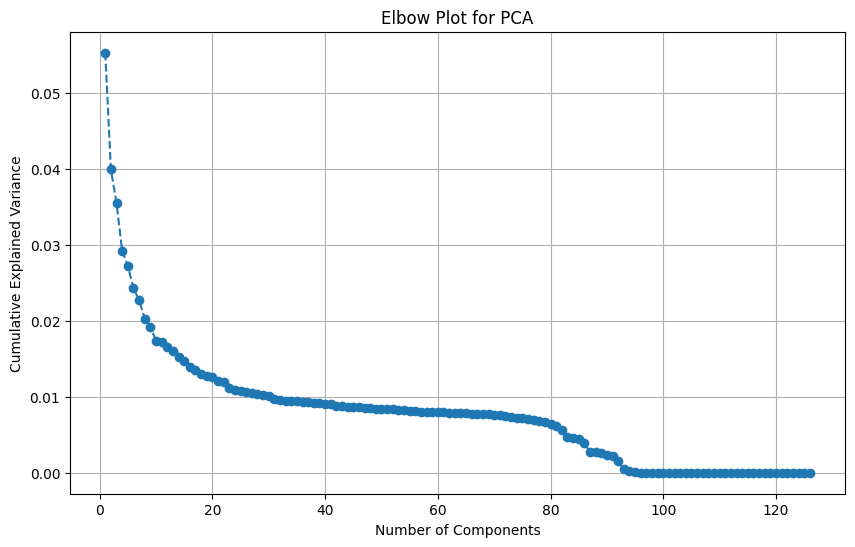

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.grid()
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_)

1.0000000000000004

In [ ]:
n_comp = 65
pca_optimal_std = PCA(n_components=n_comp, random_state=20)
std_pca = pca_optimal_std.fit_transform(std_scaled)

total_explained_variance = sum(pca_optimal_std.explained_variance_ratio_)

print(f"The optimal components explain {total_explained_variance * 100:.2f}% of the variance in the data.")

The optimal components explain 84.40% of the variance in the data.


In [ ]:
pca_std_df = pd.DataFrame(data=std_pca, columns=['PCA_'+str(i+1) for i in range(n_comp)])
pca_std_df['collision_severity_label'] = df['collision_severity_label']

pca_std_df.to_csv('pca_std_data.csv', index=False)

#LDA with std_scalar

In [ ]:
lda_std = LinearDiscriminantAnalysis()
std_lda = lda_std.fit_transform(std_scaled, df['collision_severity_label'])

In [ ]:
sum(lda_std.explained_variance_ratio_)

0.9999999999999999

In [ ]:
lda_std_df = pd.DataFrame(data=std_lda, columns=['LDA_'+str(i+1) for i in range(std_lda.shape[1])])
lda_std_df['collision_severity_label'] = df['collision_severity_label']

lda_std_df.to_csv('lda_std_data.csv', index=False)

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df_encoded)

In [ ]:
mm_normalized = pd.DataFrame(mm_scaled)
mm_normalized['collision_severity_label'] = df['collision_severity_label']
mm_normalized.to_csv('mm_normalized_data.csv', index=False)

# **Outlier Detection:**

An outlier detection technique, specifically Isolation Forest (ISF), is mentioned in the markdown texts. This suggests that the notebook includes an implementation of ISF for identifying outliers within the dataset.

# Outlier Detection on Standard Scalar dataset

In [ ]:
std_scale = pd.DataFrame(std_scaled)
std_scale['collision_severity_label'] = df['collision_severity_label']

In [ ]:
severity_dist = std_scale["collision_severity_label"].value_counts()
print(severity_dist)

Minor Injury       35076
Moderate Injury    15749
Major Injury        3804
Fatality             514
Other                  1
Name: collision_severity_label, dtype: int64


In [ ]:
df_LOF = std_scale.copy()

In [ ]:
df_Ensembled = std_scale.copy()

In [ ]:
df_ISF = std_scale.copy()

In [ ]:
df_SVM = std_scale.copy()

In [ ]:
df_outlier =  std_scale.drop(['collision_severity_label'], axis=1)

### The Local Outlier Factor (LOF)

> This algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. Points that have a significantly lower density than their neighbors are considered as outliers.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# Use the LOF algorithm to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
predicted_outliers_lof = lof.fit_predict(df_outlier)

The LOF algorithm in SK-LEARN has hyperparameters as n_neighbours and contamination. Here I have chosen n_neighbours as 20 and the contamination as 5%. The label column is dropped before prediction.

In [ ]:
df_LOF['Predicted Outlier'] = predicted_outliers_lof

In [ ]:
df_LOF

,accident_year,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,...,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated,collision_severity_label,Predicted Outlier
0,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,-0.418661,2.384479,-0.420335,-2.138306,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
1,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,2.681891,-0.418661,-0.419379,-0.420335,0.467660,...,2.268078,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Minor Injury,1
2,0.108628,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
3,0.693742,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,-1.359810,-0.189726,10.112661,Moderate Injury,-1
4,1.083818,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
55140,0.888780,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,1.916461,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
55141,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Moderate Injury,1
55142,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Moderate Injury,1


In [ ]:
# Check for missing values
print(df_LOF.isnull().sum())

accident_year                       0
number_killed                       0
day_of_week_Friday                  0
day_of_week_Monday                  0
day_of_week_Saturday                0
                                   ..
lighting_categorized_Daylight       0
lighting_categorized_Dusk - Dawn    0
lighting_categorized_Not Stated     0
collision_severity_label            0
Predicted Outlier                   0
Length: 128, dtype: int64


In [ ]:
# Print the number of outliers
print('Number of predicted outliers:', len(df_LOF[df_LOF['Predicted Outlier'] == -1]))

Number of predicted outliers: 1103


In [ ]:
from tabulate import tabulate

# Filter the data to include only outliers (predicted outlier = -1)
outliers_lof = df_LOF[df_LOF['Predicted Outlier'] == -1]
inliers_lof =  df_LOF[df_LOF['Predicted Outlier'] == 1]

# Group the outliers by age group and count the number of occurrences
outlier_counts = outliers_lof.groupby('collision_severity_label').size().reset_index(name='Outlier count')
inlier_counts =  inliers_lof.groupby('collision_severity_label').size().reset_index(name='Inlier count')

In [ ]:
from prettytable import PrettyTable

# Create a pretty table
table = PrettyTable()
table.field_names = ['Collision Severity Label', 'Outlier count', 'Inlier count']

# Add rows to the table
for index, row in outlier_counts.iterrows():
    label = row['collision_severity_label']
    outlier_count = row['Outlier count']
    inlier_count = inlier_counts.loc[inlier_counts['collision_severity_label'] == label]['Inlier count']
    if not inlier_count.empty:
        inlier_count = inlier_count.iloc[0]
        table.add_row([label, outlier_count, inlier_count])

# Print the table
print(table)

+--------------------------+---------------+--------------+
| Collision Severity Label | Outlier count | Inlier count |
+--------------------------+---------------+--------------+
|         Fatality         |      131      |     383      |
|       Major Injury       |      113      |     3691     |
|       Minor Injury       |      500      |    34576     |
|     Moderate Injury      |      358      |    15391     |
+--------------------------+---------------+--------------+


# ISF

> Isolation Forest is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.



In [ ]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest object
isf = IsolationForest(n_estimators=100, contamination=0.05)

# Fit the model to your data
isf.fit(df_outlier)

# Use the model to predict outliers
predicted_outliers_isf = isf.predict(df_outlier)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In the given code n_estimators=100 specifies the number of trees to be used in the isolation forest. Increasing the number of trees can improve the accuracy of the model, but it also increases the computational time. contamination=0.05 specifies the expected proportion of anomalies in the dataset. Here, it is set to 0.05 which means that the model is expected to identify 5% of the dataset as outliers.

In [ ]:
df_ISF['Predicted Outlier'] = predicted_outliers_isf
df_ISF

,accident_year,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,...,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated,collision_severity_label,Predicted Outlier
0,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,-0.418661,2.384479,-0.420335,-2.138306,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
1,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,2.681891,-0.418661,-0.419379,-0.420335,0.467660,...,2.268078,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Minor Injury,1
2,0.108628,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
3,0.693742,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,-1.359810,-0.189726,10.112661,Moderate Injury,1
4,1.083818,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
55140,0.888780,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,1.916461,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
55141,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Moderate Injury,1
55142,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Moderate Injury,1


In [ ]:
# Print the number of outliers
print('Number of predicted outliers ISF :', len(df_ISF[df_ISF['Predicted Outlier'] == -1]))

Number of predicted outliers ISF : 2758


In [ ]:
from tabulate import tabulate

# Filter the data to include only outliers (predicted outlier = -1)
outliers_isf = df_ISF[df_ISF['Predicted Outlier'] == -1]
inliers_isf =  df_ISF[df_ISF['Predicted Outlier'] == 1]

# Group the outliers by age group and count the number of occurrences
outlier_counts = outliers_isf.groupby('collision_severity_label').size().reset_index(name='Outlier count')
inlier_counts =  inliers_isf.groupby('collision_severity_label').size().reset_index(name='Inlier count')

In [ ]:
from prettytable import PrettyTable

# Create a pretty table
table = PrettyTable()
table.field_names = ['Collision Severity Label', 'Outlier count', 'Inlier count']

# Add rows to the table
for index, row in outlier_counts.iterrows():
    label = row['collision_severity_label']
    outlier_count = row['Outlier count']
    inlier_count = inlier_counts.loc[inlier_counts['collision_severity_label'] == label]['Inlier count']
    if not inlier_count.empty:
        inlier_count = inlier_count.iloc[0]
        table.add_row([label, outlier_count, inlier_count])

# Print the table
print(table)

+--------------------------+---------------+--------------+
| Collision Severity Label | Outlier count | Inlier count |
+--------------------------+---------------+--------------+
|         Fatality         |       98      |     416      |
|       Major Injury       |      323      |     3481     |
|       Minor Injury       |      1404     |    33672     |
|     Moderate Injury      |      932      |    14817     |
+--------------------------+---------------+--------------+


# OCSV

> One class SVM is an anomaly detection algorithm based on the concept of support vector Machine but instead of separating two classes of data points, it learns a boundary around most of the data points that defines the region of normality. Here I have used the RBF kernel which is radial basic function kernel, and the nu value is 0.05 which is the fraction of the outliers allowed to be present in the dataset.



In [ ]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.05)
ocsvm.fit(df_outlier)
predicted_outliers_ocsvm = ocsvm.predict(df_outlier)

We have created a function to perform all the outlier detection methods which includes LOF, ISF and One class SVM. So, we are finding outliers on Original encoded dataset, PCA dataset and LDA dataset.

In [ ]:
df_SVM['Predicted Outlier'] = predicted_outliers_ocsvm
df_SVM

,accident_year,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,...,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated,collision_severity_label,Predicted Outlier
0,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,-0.418661,2.384479,-0.420335,-2.138306,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
1,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,2.681891,-0.418661,-0.419379,-0.420335,0.467660,...,2.268078,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Minor Injury,1
2,0.108628,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
3,0.693742,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,-1.359810,-0.189726,10.112661,Moderate Injury,-1
4,1.083818,-0.096046,-0.431537,-0.396912,2.520618,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
55140,0.888780,-0.096046,2.317299,-0.396912,-0.396728,-0.372871,-0.418661,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,1.916461,-0.094589,-0.651060,0.735397,-0.189726,-0.098886,Minor Injury,1
55141,-0.086410,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Moderate Injury,1
55142,1.668932,-0.096046,-0.431537,-0.396912,-0.396728,-0.372871,2.388567,-0.419379,-0.420335,0.467660,...,-0.440902,-0.385696,-0.521795,-0.094589,1.535956,-1.359810,-0.189726,-0.098886,Moderate Injury,1


In [ ]:
# Print the number of outliers
print('Number of predicted outliers SVM :', len(df_SVM[df_SVM['Predicted Outlier'] == -1]))

Number of predicted outliers SVM : 2761


In [ ]:
from tabulate import tabulate

# Filter the data to include only outliers (predicted outlier = -1)
outliers_svm = df_SVM[df_SVM['Predicted Outlier'] == -1]
inliers_svm =  df_SVM[df_SVM['Predicted Outlier'] == 1]

# Group the outliers by age group and count the number of occurrences
outlier_counts = outliers_svm.groupby('collision_severity_label').size().reset_index(name='Outlier count')
inlier_counts =  inliers_svm.groupby('collision_severity_label').size().reset_index(name='Inlier count')

In [ ]:
outlier_counts

,collision_severity_label,Outlier count
0,Fatality,275
1,Major Injury,255
2,Minor Injury,1290
3,Moderate Injury,940
4,Other,1


In [ ]:
from prettytable import PrettyTable

# Create a pretty table
table = PrettyTable()
table.field_names = ['Collision Severity Label', 'Outlier count', 'Inlier count']

# Add rows to the table
for index, row in outlier_counts.iterrows():
    label = row['collision_severity_label']
    outlier_count = row['Outlier count']
    inlier_count = inlier_counts.loc[inlier_counts['collision_severity_label'] == label]['Inlier count']
    if not inlier_count.empty:
        inlier_count = inlier_count.iloc[0]
        table.add_row([label, outlier_count, inlier_count])

# Print the table
print(table)

+--------------------------+---------------+--------------+
| Collision Severity Label | Outlier count | Inlier count |
+--------------------------+---------------+--------------+
|         Fatality         |      275      |     239      |
|       Major Injury       |      255      |     3549     |
|       Minor Injury       |      1290     |    33786     |
|     Moderate Injury      |      940      |    14809     |
+--------------------------+---------------+--------------+


In [ ]:
df_encoded['collision_severity_label'] = df['collision_severity_label']

### Summary of Outliers Models

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from tabulate import tabulate
import pandas as pd

def outlier_detection_summary(df):
    # Perform Local Outlier Factor (LOF) outlier detection
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
    predicted_outliers_lof = lof.fit_predict(df.drop(columns=['collision_severity_label']))
    df['LOF'] = predicted_outliers_lof

    # Perform Isolation Forest (ISF) outlier detection
    isf = IsolationForest(n_estimators=100, contamination=0.02)
    predicted_outliers_isf = isf.fit_predict(df.drop(columns=['collision_severity_label']))
    df['ISF'] = predicted_outliers_isf

    # Perform One-Class Support Vector Machine (SVM) outlier detection
    ocsvm = OneClassSVM(kernel='rbf', nu=0.02)
    predicted_outliers_ocsvm = ocsvm.fit_predict(df.drop(columns=['collision_severity_label']))
    df['SVM'] = predicted_outliers_ocsvm

    # Create summary table
    outlier_counts = []
    inlier_counts = []
    for method in ['LOF', 'ISF', 'SVM']:
        # Filter the data to include only outliers (predicted outlier = -1)
        outliers = df[df[method] == -1]
        inliers = df[df[method] == 1]

        # Group the outliers by collision_severity_label and count the number of occurrences
        outlier_counts_method = outliers.groupby('collision_severity_label').size().reset_index(name=f'{method} Outliers')
        inlier_counts_method = inliers.groupby('collision_severity_label').size().reset_index(name=f'{method} Inliers')

        # Append the method-specific outlier and inlier counts to the overall lists
        outlier_counts.append(outlier_counts_method)
        inlier_counts.append(inlier_counts_method)

    # Merge the outlier and inlier counts into a single table
    summary_table = pd.merge(outlier_counts[0], outlier_counts[1], on='collision_severity_label', how='outer').fillna(0)
    summary_table = pd.merge(summary_table, outlier_counts[2], on='collision_severity_label', how='outer').fillna(0)
    summary_table = pd.merge(summary_table, inlier_counts[0], on='collision_severity_label', how='outer').fillna(0)
    summary_table = pd.merge(summary_table, inlier_counts[1], on='collision_severity_label', how='outer').fillna(0)
    summary_table = pd.merge(summary_table, inlier_counts[2], on='collision_severity_label', how='outer').fillna(0)

    # Format the summary table
    headers = summary_table.columns.tolist()
    headers[0] = 'Collision Severity Label'
    summary_table.columns = headers
    summary_table = summary_table.round(2)
    summary_table = summary_table[['Collision Severity Label', 'LOF Outliers', 'ISF Outliers', 'SVM Outliers', 'LOF Inliers', 'ISF Inliers', 'SVM Inliers']]
    summary_table = summary_table.set_index('Collision Severity Label')

    # Return the summary table as a formatted string
    return tabulate(summary_table, headers='keys', tablefmt='presto')


In [ ]:
summary_table_encoded = outlier_detection_summary(df_encoded)
print(summary_table_encoded)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 Collision Severity Label   |   LOF Outliers |   ISF Outliers |   SVM Outliers |   LOF Inliers |   ISF Inliers |   SVM Inliers
----------------------------+----------------+----------------+----------------+---------------+---------------+---------------
 Fatality                   |             87 |             78 |             56 |           427 |           436 |           458
 Major Injury               |            106 |            129 |            133 |          3698 |          3675 |          3671
 Minor Injury               |            547 |            540 |            622 |         34529 |         34536 |         34454
 Moderate Injury            |            362 |            355 |            402 |         15387 |         15394 |         15347
 Other                      |              1 |              1 |              0 |             0 |             0 |             1


### **Ensembling**

In [ ]:
def outlier_detection_ensemble(df):
    # Call the outlier_detection_summary function to get outlier counts for each method
    summary_table = outlier_detection_summary(df)

    # Calculate the ensembled result
    df['Ensemble'] = (df['LOF'] + df['ISF'] + df['SVM']) / 3
    df['Ensemble'] = df['Ensemble'].apply(lambda x: -1 if x < 0 else 1)

    # Calculate the number of outliers for each method and the ensembled result
    outlier_counts = {
        'LOF': df[df['LOF'] == -1].shape[0],
        'ISF': df[df['ISF'] == -1].shape[0],
        'SVM': df[df['SVM'] == -1].shape[0],
        'Ensemble': df[df['Ensemble'] == -1].shape[0]
    }

    # Create a summary table for the number of outliers
    outlier_counts_table = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outliers'])

    # Format the table
    outlier_counts_table.index.name = 'Method'

    # Return the table as a formatted string
    result = f'Outlier Counts:\n{outlier_counts_table.to_string()}'
    return result


In [ ]:
result_encoded = outlier_detection_ensemble(df_encoded)

# Print the result
print("Encoded Dataset Outlier Count", result_encoded)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Encoded Dataset Outlier Count Outlier Counts:
          Outliers
Method            
LOF           1103
ISF           1103
SVM           1564
Ensemble       525


In [ ]:
std_scale = pd.DataFrame(std_scaled)
std_scale['collision_severity_label'] = df['collision_severity_label']

In [ ]:
summary_table_std = outlier_detection_summary(std_scale)
print(summary_table_std)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 Collision Severity Label   |   LOF Outliers |   ISF Outliers |   SVM Outliers |   LOF Inliers |   ISF Inliers |   SVM Inliers
----------------------------+----------------+----------------+----------------+---------------+---------------+---------------
 Fatality                   |            131 |            120 |            140 |           383 |           394 |           374
 Major Injury               |            113 |            123 |            114 |          3691 |          3681 |          3690
 Minor Injury               |            500 |            524 |            511 |         34576 |         34552 |         34565
 Moderate Injury            |            358 |            336 |            382 |         15391 |         15413 |         15367
 Other                      |              1 |              0 |              1 |             0 |             1 |             0


In [ ]:
result_std = outlier_detection_ensemble(std_scale)

# Print the result
print("Standard Scaled Dataset Outlier Count", result_std)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Standard Scaled Dataset Outlier Count Outlier Counts:
          Outliers
Method            
LOF           1103
ISF           1103
SVM           1126
Ensemble       740


#PCA dataset

In [ ]:
summary_table_pca = outlier_detection_summary(pca_std_df)
print(summary_table_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 Collision Severity Label   |   LOF Outliers |   ISF Outliers |   SVM Outliers |   LOF Inliers |   ISF Inliers |   SVM Inliers
----------------------------+----------------+----------------+----------------+---------------+---------------+---------------
 Fatality                   |            153 |             70 |            129 |           361 |           444 |           385
 Major Injury               |             98 |             92 |            109 |          3706 |          3712 |          3695
 Minor Injury               |            500 |            547 |            500 |         34576 |         34529 |         34576
 Moderate Injury            |            352 |            394 |            380 |         15397 |         15355 |         15369
 Other                      |              0 |              0 |              1 |             1 |             1 |             0


In [ ]:
result_pca = outlier_detection_ensemble(pca_std_df)

# Print the result
print(result_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Counts:
          Outliers
Method            
LOF           1103
ISF           1103
SVM           1093
Ensemble       846


#LDA DATASET

In [ ]:
lda_std_df
summary_table_lda = outlier_detection_summary(lda_std_df)
print(summary_table_lda)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 Collision Severity Label   |   LOF Outliers |   ISF Outliers |   SVM Outliers |   LOF Inliers |   ISF Inliers |   SVM Inliers
----------------------------+----------------+----------------+----------------+---------------+---------------+---------------
 Fatality                   |             94 |            455 |            432 |           420 |            59 |            82
 Major Injury               |            110 |             77 |             87 |          3694 |          3727 |          3717
 Minor Injury               |            551 |            306 |            293 |         34525 |         34770 |         34783
 Moderate Injury            |            347 |            264 |            290 |         15402 |         15485 |         15459
 Other                      |              1 |              1 |              1 |             0 |             0 |             0


In [ ]:
result_lda = outlier_detection_ensemble(lda_std_df)

# Print the result
print(result_lda)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Counts:
          Outliers
Method            
LOF           1103
ISF           1103
SVM           1103
Ensemble       948


## **Discussion of Results for Outlier Detection**

> One thing to note from the outlier detection performed on all the different dataset is we can see with a contamination of 5% specified to the outlier detection models we can conclude that the LOF and ISF predicted the 2758 instances as outliers in all the dataset. Since SVM is a tree-based model its detection of outliers is not the same across all the datasets.